In [737]:
import numpy as np #load libraries
import pandas as pd
from matplotlib import pyplot as plt 

In [738]:
#open twiss.tfs and read line by line, store each line as a string in a list
filename = "/Users/sebastiankalos/Documents/CERN_2021/forSebastian/output/twiss.tfs"
copy_lines=[]
with open(filename) as f:
    lines = f.readlines()

for line in lines:
    split_line = line.split()
    copy_lines.append(split_line)

In [739]:
#just declaring a list for each column
name,s,betx,alphx,bety,alphy,mux,muy = [],[],[],[],[],[],[],[]

In [740]:
#from each line, extract a name/number and append it into its relevant column
for i in range(48,len(copy_lines)-1): #49th line in the file is the first relevant one
    line = copy_lines[i]

    name.append(line[0])
    s.append(line[1])
    betx.append(line[2])
    alphx.append(line[3])
    bety.append(line[4])
    alphy.append(line[5])
    mux.append(line[6])
    muy.append(line[7])

In [741]:
#extracted values are strings --> cast numbers to floats
for i in range(0, len(betx)):
    s[i] = float(s[i])
    betx[i] = float(betx[i])
    alphx[i] = float(alphx[i])
    bety[i] = float(bety[i])
    alphx[i] = float(alphx[i])
    mux[i] = float(mux[i])
    muy[i] = float(muy[i])

Text(0, 0.5, 'Beta [m]')

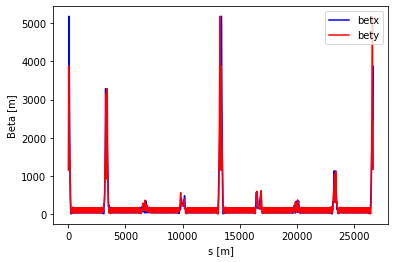

In [742]:
#just a plot of beta functions - for check
plt.plot(s,betx, 'b',label='betx')
plt.plot(s,bety, 'r',label='bety')
plt.legend(loc="upper right")
plt.xlabel('s [m]')
plt.ylabel('Beta [m]')

Text(0, 0.5, 'phase [rad]')

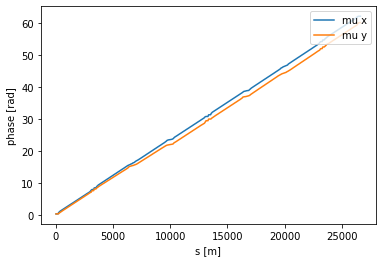

In [743]:
plt.plot(s, mux, label='mu x')
plt.plot(s, muy, label='mu y')
plt.legend(loc="upper right")
plt.xlabel('s [m]')
plt.ylabel('phase [rad]')


In [744]:
#get the phase differences between the next and current BPM
mux_diff=[]
muy_diff=[]
for i in range(0,len(mux)-1):
    mux_diff.append((mux[i+1]-mux[i])*360) #already translate from rad into deg
for i in range(0,len(muy)-1):
    muy_diff.append((muy[i+1]-muy[i])*360)

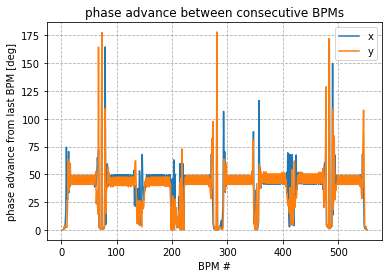

In [745]:
#plot phase advance between consecutive BPMs
bpm_num = np.arange(2,len(mux)+1)
plt.plot(bpm_num, mux_diff,label='x')
plt.plot(bpm_num, muy_diff,label='y')
plt.legend(loc="upper right")
plt.grid(linestyle='--')
plt.xlabel('BPM #')
plt.ylabel('phase advance from last BPM [deg]')
plt.title('phase advance between consecutive BPMs')
plt.savefig('lhc_phase_adv.png', dpi=300)


In [746]:
#get the phase difference between one after next and current BPM
mux_plus2_diff = []
muy_plus2_diff = []
for i in range(0,len(mux)-2):
    mux_plus2_diff.append((mux[i+2]-mux[i])*360) #already translate from rad into deg
for i in range(0,len(muy)-2):
    muy_plus2_diff.append((muy[i+2]-muy[i])*360) #already translate from rad into deg

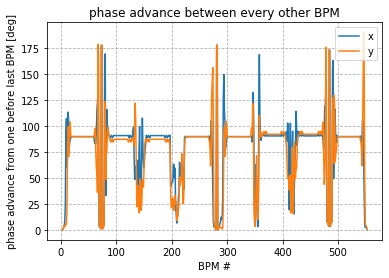

In [747]:
#plot phase advance between every other BPM
bpm_num_plus2 = np.arange(3,len(mux)+1)
plt.plot(bpm_num_plus2, mux_plus2_diff,label='x')
plt.plot(bpm_num_plus2, muy_plus2_diff,label='y')
plt.legend(loc="upper right")
plt.grid(linestyle='--')
plt.xlabel('BPM #')
plt.ylabel('phase advance from one before last BPM [deg]')
plt.title('phase advance between every other BPM')
plt.savefig('lhc_phase_adv_plus2.png', dpi=300)

In [748]:
#function that creates a list of all BPM pairs close to n*pi phase advance
#takes a list of BPM phases and tolerance (+-degs), outputs a dataframe
def get_BPM_pairs(mu, tolerance):

    BPM_pairs = [] 
    n_of_BPMs=len(mu) #mux is the list of BPM phases from MADX output

    for i in range(0, n_of_BPMs-1): #scan through all x-values of phase (each BPM) values in 2*pi
        #for each BPM phase value:
        for j in range(i+1, n_of_BPMs-1): #scan through all NEXT BPM phases
            diff_deg = (mu[j]-mu[i+1])*360 #get phase difference in degs
            remainder = diff_deg % 180 #find modulus 180 of the phase difference

            if remainder <= tolerance: 
                BPM_pairs.append(["BPM{}".format(i+1), "BPM{}".format(j+1), remainder]) #BPM 1 has index 0 --> j+1
            if (180-remainder) <= tolerance:
                BPM_pairs.append(["BPM{}".format(i+1), "BPM{}".format(j+1), (-1)*(180-remainder)]) #negative sign for an undershoot!

    #put the list into a formatted dataframe
    BPM_pairs = np.array(BPM_pairs) #cast list into numpy array
    data = {'from BPM':BPM_pairs[:,0], 
            'to BPM':BPM_pairs[:,1],
            'phase overshoot':BPM_pairs[:,2]}
    BPM_pairs_df = pd.DataFrame(data)

    return(BPM_pairs_df)



# These are the x-axis BPM Pairs:

In [749]:
BPM_pairs_x = get_BPM_pairs(mux, 0.05) #second input is the +- tolerance [deg]
BPM_pairs_x

,from BPM,to BPM,phase overshoot
0,BPM1,BPM2,0.0
1,BPM2,BPM3,0.0
2,BPM3,BPM4,0.0
3,BPM4,BPM5,0.0
4,BPM5,BPM6,0.0
5,BPM5,BPM288,-0.004735045824418194
6,BPM6,BPM7,0.0
7,BPM7,BPM8,0.0
8,BPM8,BPM9,0.0
9,BPM9,BPM10,0.0


# These are the y-axis pairs:

In [750]:
BPM_pairs_y = get_BPM_pairs(muy, 0.05) #second input is the +- tolerance [deg]
BPM_pairs_y

,from BPM,to BPM,phase overshoot
0,BPM1,BPM2,0.0
1,BPM2,BPM3,0.0
2,BPM3,BPM4,0.0
3,BPM3,BPM203,0.005342678907254594
4,BPM4,BPM5,0.0
5,BPM5,BPM6,0.0
6,BPM6,BPM7,0.0
7,BPM7,BPM8,0.0
8,BPM8,BPM9,0.0
9,BPM9,BPM10,0.0
